In [7]:
from skimage import io
import numpy as np
from scipy.ndimage import gaussian_filter
import cv2
import matplotlib.pyplot as plt

Threshold = 42.29296875


(-0.5, 1279.5, 719.5, -0.5)

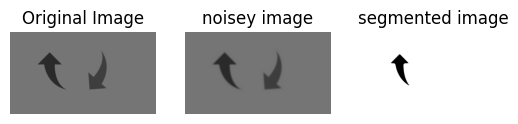

In [8]:

def otsu_threshold(image):

  # Calculate histogram
  hist, bins = np.histogram(image.flatten(), bins=256)

  # Normalize histogram
  prob = hist / np.sum(hist)
  # Calculate cumulative distribution functions (CDFs)
  w1 = np.cumsum(prob)
  w2 = 1 - w1

  # Calculate mean intensity
  mean = np.mean(image)

  # Initialize variables for loop
  between_class_variance = np.zeros(len(bins))
  threshold = None

  # Iterate through all possible thresholds
  for i in range(1, len(bins)-1):
    t = bins[i]
    v1 = w1[i-1] * (mean - bins[i-1])**2
    v2 = w2[i] * (mean - bins[i])**2
    between_class_variance[i] = v1 + v2

  # Find the threshold with the maximum between-class variance
  max_variance = np.max(between_class_variance)
  threshold = bins[np.argmax(between_class_variance)]

  return threshold

image = cv2.imread('grayimage4.png')

# Add Gaussian noise (adjust mean and standard deviation as needed)
noisy_image = gaussian_filter(image, sigma=5)

# Apply Otsu's algorithm to find the optimal threshold
threshold = otsu_threshold(noisy_image)
print(f"Threshold = {threshold}")

# Threshold the image based on the optimal threshold
segmented_image = np.copy(noisy_image)

segmented_image[segmented_image <= threshold] = 0  # Background
segmented_image[segmented_image > threshold] = 255  # Foreground

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('noisey image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image, cmap='gray')
plt.title('segmented image')
plt.axis('off')



In [ ]:
threshold

254.00390625